## Handling Missing Values -  Random Value Imputation 
    Random Value Imputation from the Same Column is a technique used to handle missing data where you replace the missing values (NA or null) in a feature (column) by randomly selecting a value from the existing, non-missing values in that same column. This method can be applied to both numerical and categorical features.
    
    -> How It Works 
        - Identify Known Values: Collect all the observed (non-missing) data points in the column with missing values.
        - Random Sampling: For each missing entry, a value is chosen at random from the list of known values collected.
        - Replacement: The missing entry is replaced with the randomly sampled value.
       Variance Is Mantain But Co-Variance is Not.

    -> Advantages
        - Maintains statistical properties
        - Reduces imputation bias

    -> Disadvantages
        - Introduces randomness
        - Slight noise added

### Import Liraries

In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Load dataset

In [75]:
data  = pd.read_csv("train - Random_value.csv.",usecols=['Age','Fare','Survived'])
data.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


### Check for null values

In [77]:
data.isnull().mean()*100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

### Create new feature for imputation 

In [79]:
data['Age_imputed'] = data['Age']

### Spliting X and y into train and test 

In [81]:
X = data.drop(columns=['Survived'])
y = data['Survived']
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

### Fill null values at ramdom

In [83]:
X_train['Age_imputed'][X_train['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values

In [84]:
X_train.sample(5)

,Age,Fare,Age_imputed
124,54.0,77.2875,54.0
346,40.0,13.0000,40.0
14,14.0,7.8542,14.0
262,52.0,79.6500,52.0
860,41.0,14.1083,41.0


In [85]:
X_test['Age_imputed'][X_test['Age_imputed'].isnull()] = X_test['Age'].dropna().sample(X_test['Age'].isnull().sum()).values

In [86]:
X_test.head()

,Age,Fare,Age_imputed
709,NaN,15.2458,43.0
439,31.0,10.5000,31.0
840,20.0,7.9250,20.0
720,6.0,33.0000,6.0
39,14.0,11.2417,14.0


### Check The Distribution and spred, outlier For Original And Imputed Age Variable

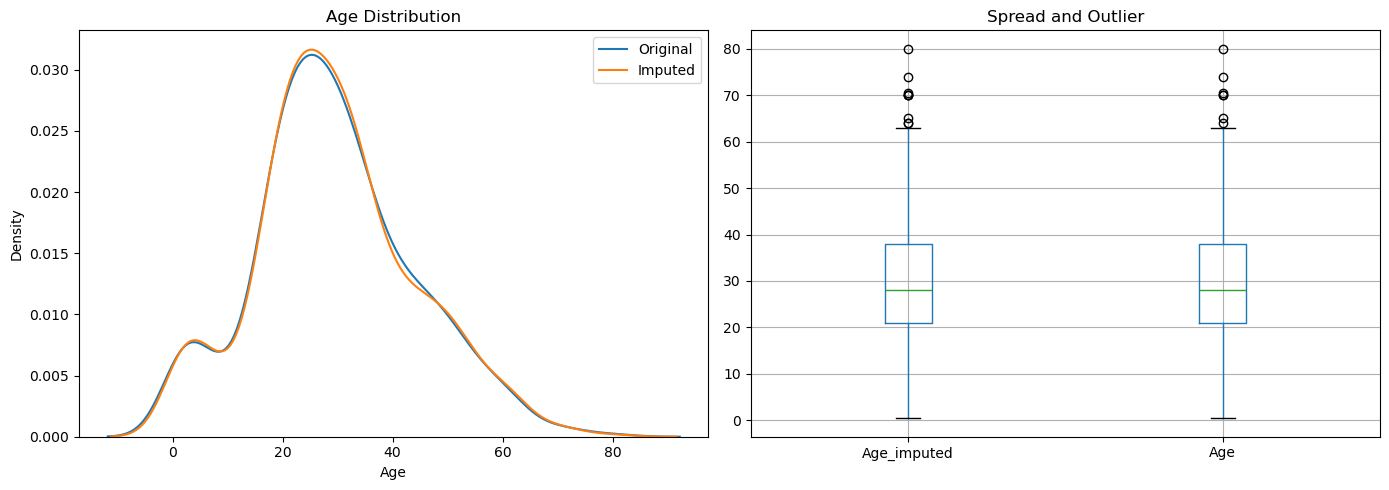

In [88]:
plt.figure(figsize=(14,5))
plt.subplot(121)
sns.distplot(X_train['Age'],label = 'Original', hist=False)
sns.distplot(X_train['Age_imputed'],label = 'Imputed', hist=False)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.legend()

plt.subplot(122)
X_train[['Age_imputed','Age']].boxplot()
plt.title("Spread and Outlier")
plt.tight_layout()
plt.show()

### For X_test

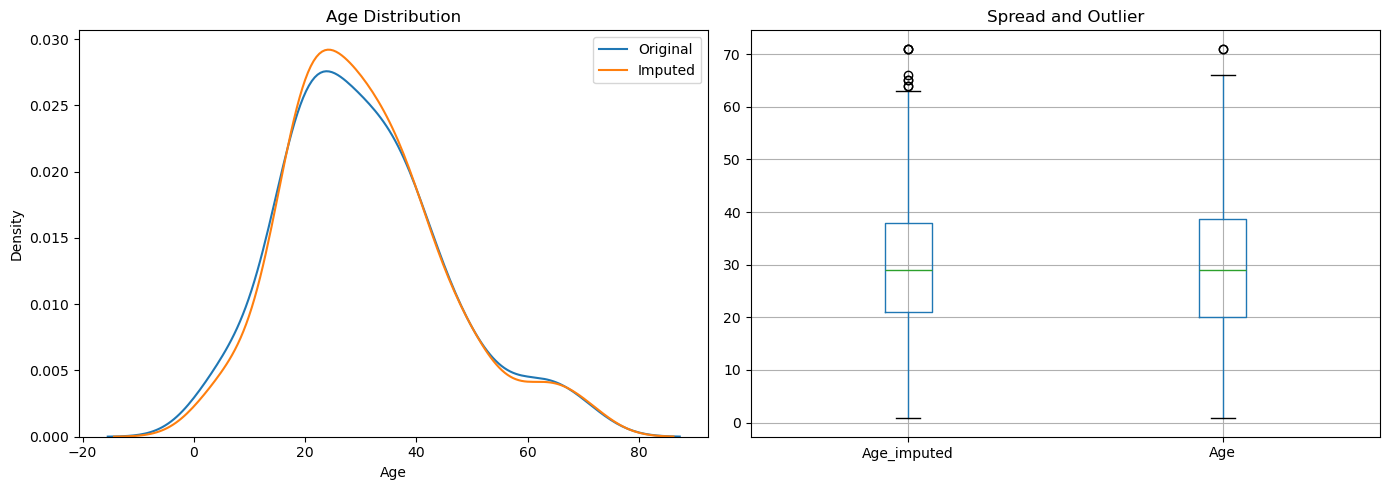

In [106]:
plt.figure(figsize=(14,5))
plt.subplot(121)
sns.distplot(X_test['Age'],label = 'Original', hist=False)
sns.distplot(X_test['Age_imputed'],label = 'Imputed', hist=False)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.legend()

plt.subplot(122)
X_test[['Age_imputed','Age']].boxplot()
plt.title("Spread and Outlier")
plt.tight_layout()
plt.show()

### Check The Variance For Age and Age_imputed

In [90]:
print("Original Variable Variance",X_train['Age'].var())
print("Imputed Variable Variance",X_train['Age_imputed'].var())

Original Variable Variance 210.2517072477438
Imputed Variable Variance 209.43174964522177


### Check The Co-Variance 

In [92]:
X_train[['Age_imputed','Fare']].cov()

,Age_imputed,Fare
Age_imputed,209.431750,52.060096
Fare,52.060096,2700.831981
